In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker


#Converts a set of columns (most commonly with year/date data) into index
def column_to_index(df):
    temp_dict = {}
    for i in range(len(df.index)):
        temp_dict.update({df.index[i]: []})
        
    for k in temp_dict:
        for j in range(len(df.columns)): 
 
            temp_dict[k].append(df[df.columns[j]].loc[k])
            
    return temp_dict

In [269]:
wages_2018 = pd.read_stata('epi_cpsorg_2018.dta')
wages_2019 = pd.read_stata('epi_cpsorg_2019.dta')
wages_2020 = pd.read_stata('epi_cpsorg_2020.dta')
wages_2021 = pd.read_stata('epi_cpsorg_2021.dta')
wages_2022 = pd.read_stata('epi_cpsorg_2022.dta')
wages_2023 = pd.read_stata('epi_cpsorg_2023.dta')
#Economic Policy Institute. 2023. Current Population Survey Extracts, Version 1.0.47, https://microdata.epi.org.


wages_2018 = wages_2018[(wages_2018.lfstat == 'Employed') & (wages_2018.wageotc.isna() == False)]
wages_2019 = wages_2019[(wages_2019.lfstat == 'Employed') & (wages_2019.wageotc.isna() == False)]
wages_2020 = wages_2020[(wages_2020.lfstat == 'Employed') & (wages_2020.wageotc.isna() == False)]
wages_2021 = wages_2021[(wages_2021.lfstat == 'Employed') & (wages_2021.wageotc.isna() == False)]
wages_2022 = wages_2022[(wages_2022.lfstat == 'Employed') & (wages_2022.wageotc.isna() == False)]
wages_2023 = wages_2023[(wages_2023.lfstat == 'Employed') & (wages_2023.wageotc.isna() == False)]
#Exclude folks who are not employed from the dataset

print(wages_2023)

wages_18_abridged = wages_2018[['hhid', 'hrhhid', 'hrhhid2', 'hoursu1i', 'hoursut',
                                'lfstat', 'month', 'multjobs', 'orgwgt', 'personid','wageotc','weekpay', 'wbhaom', 'year']]
wages_19_abridged = wages_2019[[ 'hhid', 'hrhhid', 'hrhhid2', 'hoursu1i', 'hoursut',
                                'lfstat', 'month', 'multjobs', 'orgwgt', 'personid','wageotc','weekpay', 'wbhaom', 'year']]
wages_20_abridged = wages_2020[['hhid', 'hrhhid', 'hrhhid2', 'hoursu1i','hoursut', 
                                'lfstat', 'month', 'multjobs','orgwgt', 'personid', 'wageotc','weekpay', 'wbhaom', 'year']]
wages_21_abridged = wages_2021[['hhid', 'hrhhid', 'hrhhid2', 'hoursu1i','hoursut',
                                'lfstat', 'month', 'multjobs', 'orgwgt', 'personid','wageotc','weekpay','wbhaom', 'year']]
wages_22_abridged = wages_2022[[ 'hhid', 'hrhhid', 'hrhhid2', 'hoursu1i','hoursut', 
                                'lfstat', 'month', 'multjobs', 'orgwgt','personid', 'wageotc', 'weekpay','wbhaom', 'year']]
wages_23_abridged = wages_2023[['hhid', 'hrhhid', 'hrhhid2', 'hoursu1i','hoursut', 
                                'lfstat', 'month', 'multjobs', 'orgwgt','personid', 'wageotc', 'weekpay','wbhaom', 'year']]

wages_18_23 = pd.concat([wages_18_abridged, wages_19_abridged, wages_20_abridged, wages_21_abridged, wages_22_abridged, wages_23_abridged])
#Unified data for 2018-2023 data sets.

print(wages_18_23)

        year  month  minsamp           hrhhid hrhhid2 hrsample hrsersuf  \
0       2023      1        4  021031415009961   15011                     
3       2023      1        4  210312190806502   15011                     
5       2023      1        4  707008783110155   15011                     
6       2023      1        4  071061021004481   15111                     
9       2023      1        4  810008350948871   15111                     
...      ...    ...      ...              ...     ...      ...      ...   
242574  2023     12        4  074104630650196   16111                     
242575  2023     12        4  363050101399581   16111                     
242577  2023     12        4  970696021517685   16011                     
242580  2023     12        4  108160587385960   16111                     
242581  2023     12        8  141165060076399   15112                     

        huhhnum  pulineno  unicon_recnum  ...  wage_noadj wageotc_noadj  \
0           NaN         

In [270]:
#This cell imports and reads CPI inflation data (monthly) so we can later merge it onto wage data ingested above.

inflation_adjusters = pd.read_csv('r_cpi_u_rs_allitems.csv')
inflation_adjusters.set_index(inflation_adjusters['YEAR'], drop = True, inplace = True)
inflation_adjusters.drop(index =[2013, 2014, 2015, 2016, 2017], inplace = True) #including 2018 as a baseline year for inflation adjustment
inflation_adjusters.drop(columns =['YEAR'], inplace = True)

adjusted_inflation = pd.DataFrame(column_to_index(inflation_adjusters))
adjusted_inflation['Month'] = adjusted_inflation.index + 1
print(adjusted_inflation)

       2018     2019     2020     2021     2022     2023  Month
0   247.867  251.712  257.971  261.582  281.148  299.170      1
1   248.991  252.776  258.678  263.014  283.716  300.840      2
2   249.554  254.202  258.115  264.877  287.504  301.836      3
3   250.546  255.548  256.389  267.054  289.109  303.363      4
4   251.588  256.092  256.394  269.195  292.296  304.127      5
5   251.989  256.143  257.797  271.696  296.311  305.109      6
6   252.006  256.571  259.101  273.003  296.276  305.691      7
7   252.146  256.558  259.918  273.567  296.171  307.026      8
8   252.439  256.759  260.280  274.310  296.808  307.789      9
9   252.885  257.346  260.388  276.589  298.012  307.671     10
10  252.038  257.208  260.229  277.948  297.711  307.051     11
11  251.233  256.974  260.474  278.802  296.797  306.746     12


In [271]:
wages_18_23_inflated = pd.merge(
    wages_18_23, 
    adjusted_inflation, 
    how = 'left', 
    left_on = 'month', 
    right_on = 'Month')

inflation_adjustment_20 = lambda row: 1 + (row[2018]- row[2020])/row[2020] if row.year == 2018 else (1 + (row[2019]- row[2020])/row[2020] if row.year == 2019 else (1 + (row[2020]- row[2020])/row[2020] if row.year == 2020 else (1 + (row[2021]- row[2020])/row[2020] if row.year == 2021 else (1 + (row[2022]- row[2020])/row[2020] if row.year == 2022 else (1 + (row[2023]- row[2020])/row[2020] if row.year == 2023 else 1)))))
#This Lambda function adjusts wageotc column for inflation and adjusts it to 2020 dollars specifically. 
#This means it deflates 2018 and 2019 wages while inflating 2021, 2022, and 2023

print(wages_18_23_inflated)

wages_18_23_inflated['wageotc_deflater_20'] = wages_18_23_inflated.apply(inflation_adjustment_20, axis = 1)
wages_18_23_inflated['wageotc_inflation_adj_20'] = wages_18_23_inflated.wageotc/wages_18_23_inflated.wageotc_deflater_20
print(wages_18_23_inflated)

           hhid           hrhhid hrhhid2 hoursu1i hoursut    lfstat  month  \
0          98.0  000110339935453   07011     40.0    40.0  Employed      1   
1          98.0  000110339935453   07011     40.0    40.0  Employed      1   
2        3421.0  000110359424339   07111     40.0    40.0  Employed      1   
3        3421.0  000110359424339   07111     30.0    30.0  Employed      1   
4       36974.0  000110651278174   06011     40.0    40.0  Employed      1   
...         ...              ...     ...      ...     ...       ...    ...   
834789  31167.0  074104630650196   16111      99+    99.0  Employed     12   
834790   4342.0  363050101399581   16111     40.0    56.0  Employed     12   
834791  37725.0  970696021517685   16011     40.0    40.0  Employed     12   
834792  51402.0  108160587385960   16111     40.0    40.0  Employed     12   
834793  43864.0  141165060076399   15112     40.0    40.0  Employed     12   

                               multjobs        orgwgt  personid

In [272]:
#'personalizedmonthlyid' was created to be a unique identifier for every individual in the dataset 
#just in case it is needed. Field did not end up being used and as such might be deleted in a future draft
wages_18_23_inflated['personalizedmonthlyid'] = wages_18_23_inflated['year'].map(str) + wages_18_23_inflated['hhid'].map(str) +  wages_18_23_inflated['personid'].map(str) +  wages_18_23_inflated['month'].map(str)

#Combines year and date columns of EPI extract data into a unified date identifier.
wages_18_23_inflated['date'] = wages_18_23_inflated['year'].map(str) + wages_18_23_inflated['month'].map(str)

#Since we've already calculated the inflation adjustments in 2020 dollars, we no longer need these year 
#columns from the inflation adjustments data set.
wages_18_23_inflated.drop(columns = [2018, 2019 ,2020, 2021, 2022, 2023], inplace = True)

print(wages_18_23_inflated[['wageotc', 'wageotc_deflater_20', 'wageotc_inflation_adj_20']])


          wageotc  wageotc_deflater_20  wageotc_inflation_adj_20
0       22.575001             0.960833                 23.495244
1       10.000000             0.960833                 10.407638
2       31.250000             0.960833                 32.523869
3        9.500000             0.960833                  9.887256
4       17.000000             0.960833                 17.692985
...           ...                  ...                       ...
834789   6.989899             1.177645                  5.935487
834790  26.450001             1.177645                 22.460073
834791  20.200001             1.177645                 17.152872
834792  16.000000             1.177645                 13.586433
834793  24.038250             1.177645                 20.412130

[834794 rows x 3 columns]


In [273]:
#These lines establish where the 20th, 40th, 60th, and 80th percentiles of wages in each year AND month begin. 
#This will be useful when we need to segment our workers by income quintile to examine where in the income 
#distribution the greatest wage growth has occured.
wage_quintile_1_cutoff = wages_18_23_inflated.groupby(['date'], as_index = False).wageotc_inflation_adj_20.quantile(0.2, "linear")
wage_quintile_2_cutoff = wages_18_23_inflated.groupby(['date'], as_index = False).wageotc_inflation_adj_20.quantile(0.4, "linear")
wage_quintile_3_cutoff = wages_18_23_inflated.groupby(['date'], as_index = False).wageotc_inflation_adj_20.quantile(0.6, "linear")
wage_quintile_4_cutoff = wages_18_23_inflated.groupby(['date'], as_index = False).wageotc_inflation_adj_20.quantile(0.8, "linear")

#These lines create a comprehensive table of wage quintiles that will be joinable/mergable with the rest of our wage
#data in the next cell below.
wage_quintiles = pd.DataFrame(wage_quintile_1_cutoff['date'])
wage_quintiles.drop_duplicates(inplace = True)

wage_quintiles['first_quintile_cutoff'] = wage_quintile_1_cutoff['wageotc_inflation_adj_20']
wage_quintiles['second_quintile_cutoff'] = wage_quintile_2_cutoff['wageotc_inflation_adj_20']
wage_quintiles['third_quintile_cutoff'] = wage_quintile_3_cutoff['wageotc_inflation_adj_20']
wage_quintiles['fourth_quintile_cutoff'] = wage_quintile_4_cutoff['wageotc_inflation_adj_20']

# print(wage_quintiles)

# print(wage_quintiles[wage_quintiles['date'] == '20203'])


In [274]:
#Joins/merges wage quintile/percentile data onto our main dataset.
wages18to23 = pd.merge(
    wages_18_23_inflated, 
    wage_quintiles, 
    how = 'left', 
    left_on = ['date'],
    right_on = ['date'],
    suffixes = ['', '_quintile_cutoff'])


print(wages18to23)

           hhid           hrhhid hrhhid2 hoursu1i hoursut    lfstat  month  \
0          98.0  000110339935453   07011     40.0    40.0  Employed      1   
1          98.0  000110339935453   07011     40.0    40.0  Employed      1   
2        3421.0  000110359424339   07111     40.0    40.0  Employed      1   
3        3421.0  000110359424339   07111     30.0    30.0  Employed      1   
4       36974.0  000110651278174   06011     40.0    40.0  Employed      1   
...         ...              ...     ...      ...     ...       ...    ...   
834789  31167.0  074104630650196   16111      99+    99.0  Employed     12   
834790   4342.0  363050101399581   16111     40.0    56.0  Employed     12   
834791  37725.0  970696021517685   16011     40.0    40.0  Employed     12   
834792  51402.0  108160587385960   16111     40.0    40.0  Employed     12   
834793  43864.0  141165060076399   15112     40.0    40.0  Employed     12   

                               multjobs        orgwgt  personid

In [275]:
#This function greates a column called "wage_quintile" that will allow us to know which quintile a particular worker
#falls into based on their hourly wage in any given month AND year.
def quintiles(ser,df):
    ql = []
    for i in range(len(df)):
        if ser[i] - df.loc[i,'first_quintile_cutoff'] <= 0:
            ql.append('1st quintile')
        elif ser[i] - df.loc[i,'second_quintile_cutoff'] <= 0:
            ql.append('2nd quintile')
        elif ser[i] - df.loc[i,'third_quintile_cutoff'] <= 0:
            ql.append('3rd quintile')
        elif ser[i] - df.loc[i,'fourth_quintile_cutoff'] <= 0:
            ql.append('4th quintile')
        else:
            ql.append('5th quintile')
    return ql

# quintiles = lambda row: '1st quintile' if (row['wageotc_inflation_adj']-row['1st_quintile_cutoff']) <= 0  else ('2nd quintile' if (row['wageotc_inflation_adj']-row['2nd_quintile_cutoff']) <= 0  else('3rd quintile' if (row['wageotc_inflation_adj']-row['3rd_quintile_cutoff']) <= 0 else('4th quintile' if (row['wageotc_inflation_adj']-row['4th_quintile_cutoff']) <= 0 
# else '5th quintile')))
            
#quintiles = lambda x, i : '1st quintile' if (x - wages19to23.loc[i, 'first_quintile_cutoff'] <= 0 else ('2nd quintile' if (i - wages19to23.loc[x, 'second_quintile_cutoff']) <= 0  else('3rd quintile' if (x - wages19to23.loc[i, 'third_quintile_cutoff']) <= 0  else('4th quintile' if (x - wages19to23.loc[i, 'fourth_quintile_cutoff']) <= 0 else '5th quintile'))))

#The '_20' suffix for this column allows us to keep in mind that we are creating quintiles based on wages
#adjusted to 2020 dollars.
wages18to23['wage_quintile_20'] = quintiles(wages18to23.wageotc_inflation_adj_20, wages18to23)
wages18to23med = wages18to23.groupby(['date','year', 'month', 'wage_quintile_20']).wageotc_inflation_adj_20.median().reset_index()
print(wages18to23med[wages18to23med['date'] == '20201'])

      date  year  month wage_quintile_20  wageotc_inflation_adj_20
120  20201  2020      1     1st quintile                 11.000000
121  20201  2020      1     2nd quintile                 15.600000
122  20201  2020      1     3rd quintile                 21.375000
123  20201  2020      1     4th quintile                 30.769001
124  20201  2020      1     5th quintile                 52.884499


/var/folders/_v/rc7h94c52kxfc277kw_2jchc0000gn/T/ipykernel_6163/2560509830.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  medwages.set_xticklabels(medwages.get_xticklabels(), rotation = 90)


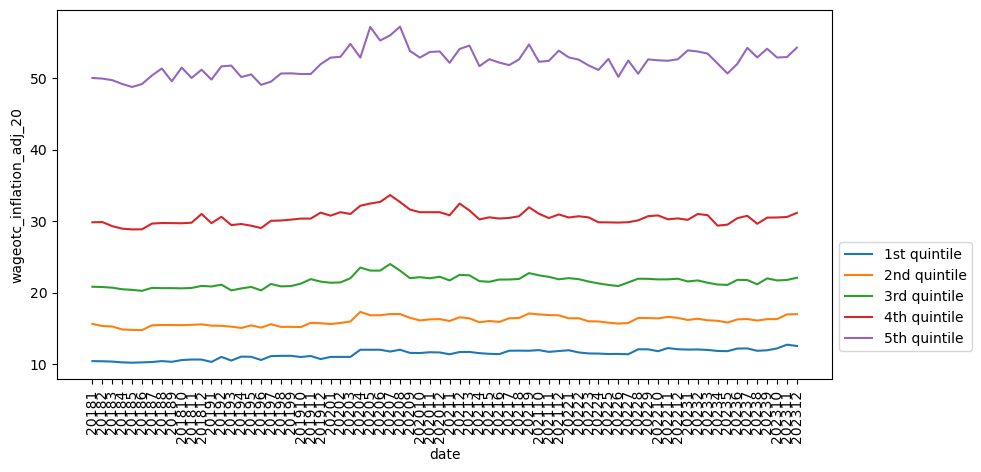

      date  year  month wage_quintile_20  wageotc_inflation_adj_20
120  20201  2020      1     1st quintile                 11.000000
121  20201  2020      1     2nd quintile                 15.600000
122  20201  2020      1     3rd quintile                 21.375000
123  20201  2020      1     4th quintile                 30.769001
124  20201  2020      1     5th quintile                 52.884499


In [276]:
#This cell creates a visualization laying out trends in hourly, inflation adjusted wages for all 5 quintiles.
#It tracks the median wage in each quintile to avoid allowing outliers in each quintile to skew the data as
#a whole (which would be the case if we used mean, for example). However, while we see that each line has a 
#very slight upward slope (barely noticeable for the 4th quintile), this chart is not ultimately the best at
#displaying wage growth from a baseline index and instead simply shows absolute growth. This gives the false
#impression that the 5th quintile has seen the greatest growth because smaller percentages of higher wages can
#end up being larger in absolute terms than larger percentages of lower wages.

wages18to23med.sort_values(by = ['year', 'month'], inplace = True, ignore_index = True)
wages18to23med.reset_index(drop = True)
wages18to23med.reset_index()

plt.figure().set_figwidth(10)
medwages = sns.lineplot(data = wages18to23med, x = 'date', y = 'wageotc_inflation_adj_20', hue = 'wage_quintile_20')
medwages.set_xticklabels(medwages.get_xticklabels(), rotation = 90)
plt.tick_params(axis = 'x', which = 'major')
plt.legend(bbox_to_anchor = (1, 0.39))
plt.show()

print(wages18to23med[wages18to23med['date'] == '20201'])


In [262]:
#In order to remedy the visualization problem described above, I create a two-column table in order to join
#wageotc in January of 2020 specifically. This will allow us to zero index wages to the first month of 2020.
wages_20 = wages18to23med[wages18to23med['date'] == '20201']
print(wages_20)
wages_20 = wages_20[['wage_quintile_20', 'wageotc_inflation_adj_20']]
print(wages_20)

print(wages19to23med[wages19to23med['date'] == '20201'])

      date  year  month wage_quintile_20  wageotc_inflation_adj_20
120  20201  2020      1     1st quintile                 11.000000
121  20201  2020      1     2nd quintile                 15.600000
122  20201  2020      1     3rd quintile                 21.375000
123  20201  2020      1     4th quintile                 30.769001
124  20201  2020      1     5th quintile                 52.884499
    wage_quintile_20  wageotc_inflation_adj_20
120     1st quintile                 11.000000
121     2nd quintile                 15.600000
122     3rd quintile                 21.375000
123     4th quintile                 30.769001
124     5th quintile                 52.884499
      date  year  month wage_quintile_20  wageotc_inflation_adj_20  \
120  20201  2020      1     1st quintile                 11.000000   
121  20201  2020      1     2nd quintile                 15.600000   
122  20201  2020      1     3rd quintile                 21.375000   
123  20201  2020      1     4th quin

In [263]:
#Joining wageotc from specifically Jan 2020 as its own column for further calculations we'll need to do to create
#a wage growth index that will more readily display % growth of wages rather than absolute growth.
wages18to23med = pd.merge(
    wages18to23med, 
    wages_20, 
    how = 'left', 
    left_on = ['wage_quintile_20'],
    right_on = ['wage_quintile_20'],
    suffixes = ['', '_jan'])

wages18to23med.sort_values(by = ['year', 'month'], inplace = True, ignore_index = True)
wages18to23med.reset_index(drop = True)
print(wages18to23med[wages18to23med['date'] == '20201'])

      date  year  month wage_quintile_20  wageotc_inflation_adj_20  \
120  20201  2020      1     1st quintile                 11.000000   
121  20201  2020      1     2nd quintile                 15.600000   
122  20201  2020      1     3rd quintile                 21.375000   
123  20201  2020      1     4th quintile                 30.769001   
124  20201  2020      1     5th quintile                 52.884499   

     wageotc_inflation_adj_20_jan  
120                     11.000000  
121                     15.600000  
122                     21.375000  
123                     30.769001  
124                     52.884499  


In [264]:
#Set January 2020 to 100. We would expect 2018 and 2019 figures to be <100 and 2021-2023 to be greater. 
#How much greater depends on how much median wages have grown in real terms within a particular quintile.
wages18to23med['wage_growth_index_20'] = 100 + ((wages18to23med['wageotc_inflation_adj_20'] - wages18to23med['wageotc_inflation_adj_20_jan'])/wages18to23med['wageotc_inflation_adj_20_jan'])*100
print(wages18to23med[wages18to23med['date'] == '20201'])
                                                                                                          

      date  year  month wage_quintile_20  wageotc_inflation_adj_20  \
120  20201  2020      1     1st quintile                 11.000000   
121  20201  2020      1     2nd quintile                 15.600000   
122  20201  2020      1     3rd quintile                 21.375000   
123  20201  2020      1     4th quintile                 30.769001   
124  20201  2020      1     5th quintile                 52.884499   

     wageotc_inflation_adj_20_jan  wage_growth_index_20  
120                     11.000000                 100.0  
121                     15.600000                 100.0  
122                     21.375000                 100.0  
123                     30.769001                 100.0  
124                     52.884499                 100.0  


/var/folders/_v/rc7h94c52kxfc277kw_2jchc0000gn/T/ipykernel_6163/1962798735.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  medwages.set_xticklabels(medwages.get_xticklabels(), rotation = 90, fontsize=10, ha = 'left')


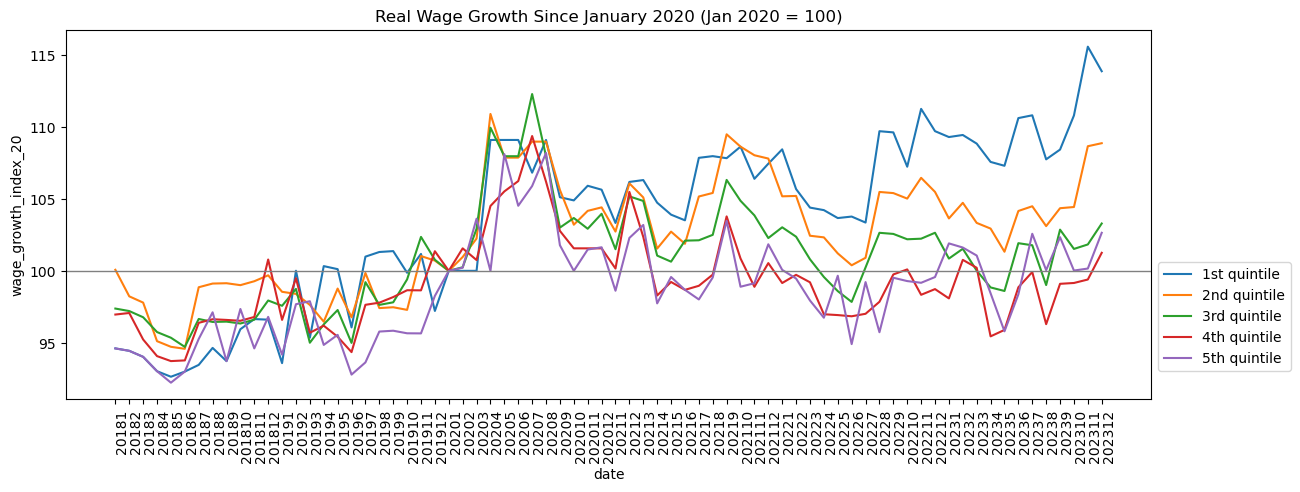

<Figure size 640x480 with 0 Axes>

In [265]:
#Here, we very clearly see massive wage growth of nearly 15% for the bottom 20% of income earners since 2020 and of
#nearly 10% for the 20% above that. While the top 3 quintiles have seen more modest growth overall (and even some
#real setbacks in 2022 as inflation ramped up), it's clear that by the end of 2023, all socioeconomic segments
#were broadly better off than they were on January 2020, right before pandemic lockdowns. As can be seen by the
#2018 and 2019 data, this growth was not a continuing trend from the couple years pre-pandemic which saw only
#modest wage growth across all quintiles 

plt.figure().set_figwidth(14)
medwages = sns.lineplot(data = wages18to23med, x = 'date', y = 'wage_growth_index_20', hue = 'wage_quintile_20')
medwages.set_xticklabels(medwages.get_xticklabels(), rotation = 90, fontsize=10, ha = 'left')
# medwages.xaxis.set_major_locator(ticker.MultipleLocator(base=1.11)) 
plt.title('Real Wage Growth Since January 2018 (Jan 2020 = 100)')
plt.tick_params(axis = 'x', which = 'major')
plt.legend(bbox_to_anchor = (1, 0.39))
plt.axhline(y = 100, xmin = 0, xmax = 1, linewidth = 1, color = 'gray')
plt.show()

#One important thing to note is that while wage growth appears to have taken off in mid-2020, this was mostly due to
#'composition effects', aka lower wage workers losing their jobs due to lockdowns. This brought average wages in the
#workforce up across the board but was clearly not a sign of a good economy since unemployment was in double digits
#from April through July and didn't come down to February 2020 levels until the end of 2020. A future improvement
#on this chart might be to map US unemployment rates by month over the wage growth lines, with a separate unemployment
#rate index on the right-hand y-axis. This will clearly show viewer the extent to which the 2020 wage bump was due
#to high unemployment (peaking at 15%).

plt.savefig('wage_growthanalysis_18.png')

/var/folders/_v/rc7h94c52kxfc277kw_2jchc0000gn/T/ipykernel_6163/220427255.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  medwages.set_xticklabels(medwages.get_xticklabels(), rotation = 90, fontsize=10, ha = 'left')


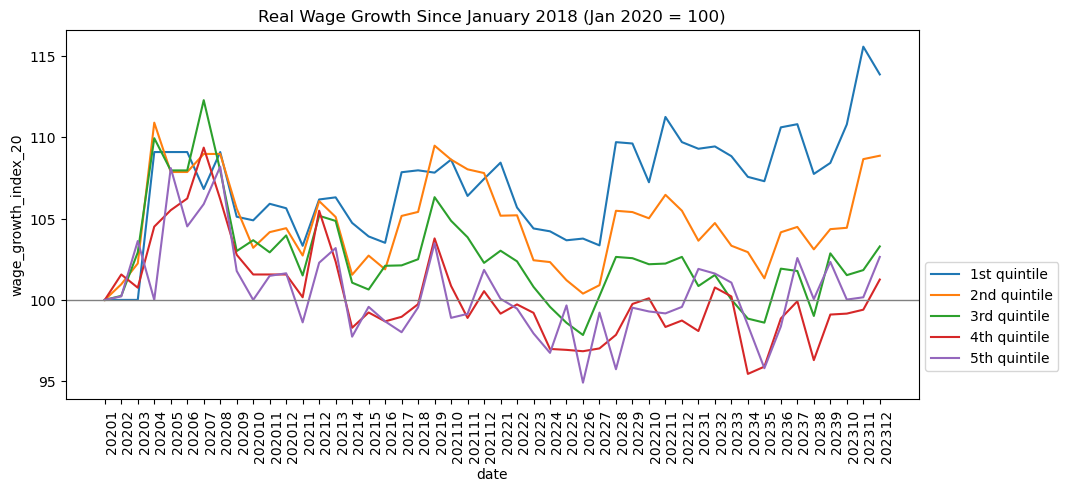

<Figure size 640x480 with 0 Axes>

In [266]:
#In order to hone in on growth specifically since January 2020, I've created an abridged data set with 
#an abridged visual here.
wages18to23med = wages18to23med[wages18to23med['year'] != 2018]
wages18to23med = wages18to23med[wages18to23med['year'] != 2019]

# print(wages19to23med)
plt.figure().set_figwidth(11)
medwages = sns.lineplot(data = wages18to23med, x = 'date', y = 'wage_growth_index_20', hue = 'wage_quintile_20')
medwages.set_xticklabels(medwages.get_xticklabels(), rotation = 90, fontsize=10, ha = 'left')
plt.title('Real Wage Growth Since January 2020 (Jan 2020 = 100)')
plt.tick_params(axis = 'x', which = 'major')
plt.legend(bbox_to_anchor = (1, 0.39))
plt.axhline(y = 100, xmin = 0, xmax = 1, linewidth = 1, color = 'gray')
plt.show()

plt.savefig('wage_growthanalysis_20.png')